> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The "No-Show Appointments" dataset typically contains information about medical appointments and whether patients attended their appointments or not


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names.
>**:

What is the overall appointment no-show rate in the dataset?

Does the presence of hypertension among patients have an impact on their likelihood of missing medical appointments?"

What are the key factors that contribute to patients missing their appointments?

Do patients who receive reminder SMS notifications have a lower rate of missing medical appointments compared to those who do not receive reminders?

Is there's a connection between the day of the week an appointment is scheduled and the likelihood of a no-show.















In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline


# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

# Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.



In [3]:
# Display the  info  of the dataframe

print("Information about the data set\n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
Information about the data set
 None


In [4]:
#display the few rows of the dataframe

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Get the summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#count the value of No and Yes in 'No-show' column
df["No-show"].value_counts()


No     88208
Yes    22319
Name: No-show, dtype: int64

In [7]:
#calculate the percetages of No and Yes values

# Calculate value counts for 'No-show' column
value_counts = df['No-show'].value_counts()

total_appointments = len(df)
percent_no = (value_counts['No']/ total_appointments)* 100 
percent_yes = (value_counts['Yes']/total_appointments)*100

print(f"Percentage of 'No' values: {percent_no:.2f}%")
print(f"Percentage of 'Yes' values: {percent_yes:.2f}%")


Percentage of 'No' values: 79.81%
Percentage of 'Yes' values: 20.19%


In [8]:
#check first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:

# Group by 'PatientId' and sum occurrences of 'No' and 'Yes'
patient_no_show_counts = df.groupby('PatientId')['No-show'].value_counts().unstack(fill_value=0)

# Print the results
print(patient_no_show_counts)




No-show       No  Yes
PatientId            
3.921784e+04   1    0
4.374176e+04   1    0
9.377953e+04   1    0
1.417242e+05   1    0
5.376153e+05   1    0
...           ..  ...
9.999320e+14   5    0
9.999350e+14   1    0
9.999465e+14   1    0
9.999686e+14   1    0
9.999816e+14   1    0

[62299 rows x 2 columns]


In [10]:
# Count the number of females and males
gender_counts = df['Gender'].value_counts()

# Print the results
print("Number of Females:", gender_counts['F'])
print("Number of Males:", gender_counts['M'])





Number of Females: 71840
Number of Males: 38687


In [11]:
#counthe values of each age
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [12]:
age_counts = df['Age'].value_counts()

# Find age with maximum and minimum attendance
age_max_attendance = age_counts.idxmax()
age_min_attendance = age_counts.idxmin()

# Print the results
print("Age with maximum attendance:", age_max_attendance)
print("Age with minimum attendance:", age_min_attendance)





Age with maximum attendance: 0
Age with minimum attendance: 99


In [13]:
#checking for completeness
df.isna().sum().sum()

0

In [14]:
#checking for validity
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [15]:
#validyt check
df['Age'].min()

-1

In [16]:
#consistency check
sum(df.duplicated())

0


## Summary Of Wrangling

In wrangling the data, i have checked variour aspect of understanding the dataset
1. checked for duplicates
2. checked the sum values
3. counted the values according to age and gender
4. Checked the total percntages of 'No' and 'Yes' in 'No-show' column




### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [17]:
#copy original data
copied_df = df.copy()


In [18]:
#changing uppercase to lowercase 
copied_df.columns = copied_df.columns.to_series().apply(lambda x: x.strip().lower().replace(' ', '-'),)


In [19]:
# Rename specific columns to snake_case
copied_df.rename(columns={
    'appointmentid': 'appointment_id',
    'scheduledday': 'scheduled_day',
    'appointmentday': 'appointment_day',
    'patientid': 'patient_id',
    'hipertension':'hypertension'
}, inplace=True)

In [20]:
copied_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
#check if there is any age less than 0
copied_df[copied_df['age']<0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [22]:
#drop the row where the age is less than 0
copied_df = copied_df.drop(copied_df[copied_df['age'] < 0].index)


In [23]:
#Change the datatype of the age as int
copied_df['age'] = copied_df['age'].astype(int)


In [24]:
#change the data type of patient_id as string
copied_df['patient_id'] = copied_df['patient_id'].astype(str).str[:6]

In [25]:
# Convert the 'ScheduledDay' and 'AppointmentDay' columns to datetime format
copied_df['scheduled_day'] = pd.to_datetime(copied_df['scheduled_day'])
copied_df['appointment_day'] = pd.to_datetime(copied_df['appointment_day'])

In [26]:
copied_df['scheduled_say'] = copied_df['scheduled_day'].dt.date
copied_df['appointment_day'] = copied_df['appointment_day'].dt.date

In [27]:
copied_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduled_say
0,298724,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29
1,558997,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29
2,426296,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29
3,867951,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29
4,884118,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29


## SUMMARY OF CLEANING
1. copied the original data 
2. removed the age where age is less than 0
3. change the datatypes of some columns
4. change the coumn_names to snake_case

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




In [28]:
def average_age_with_hypertension(copied_df):
    # Filter the dataset for patients with hypertension
    hypertension_patients = copied_df[copied_df['hypertension'] == 1]
    
    # Calculate the average age of patients with hypertension
    average_age = hypertension_patients['age'].mean()
    
    return average_age

# Call the function and pass the dataset as an argument
average_age = average_age_with_hypertension(copied_df)
print(f"The average age of patients with hypertension is: {average_age:.2f}")







The average age of patients with hypertension is: 60.61


In [29]:
### Research Question 1  :What is the overall appointment no-show rate in the dataset?
# Calculate the total number of appointments
total_appointments = len(copied_df)

# Calculate the number of no-show appointments
#no_show_appointments = df[df['No-show'] == 'Yes']['No-show'].count()
no_show_appointments = (copied_df['no-show'] == 'Yes').sum()

# Calculate the overall no-show rate
overall_no_show_rate = no_show_appointments / total_appointments

# Display the overall no-show rate
print("Overall Appointment No-Show Rate:", overall_no_show_rate)

Overall Appointment No-Show Rate: 0.20193438647919945


In [30]:
# Given no-show rate as a decimal
no_show_rate_decimal = 0.20193255946510807

# Convert to percentage and round to two decimal places
no_show_rate_percentage = round(no_show_rate_decimal * 100, 2)

# Print the result
print("Over All Appointment No-Show Rate:", no_show_rate_percentage, "%")


Over All Appointment No-Show Rate: 20.19 %


Percentage of no-show appointments for patients with hypertension: 3.41%
Percentage of no-show appointments for patients without hypertension: 16.78%


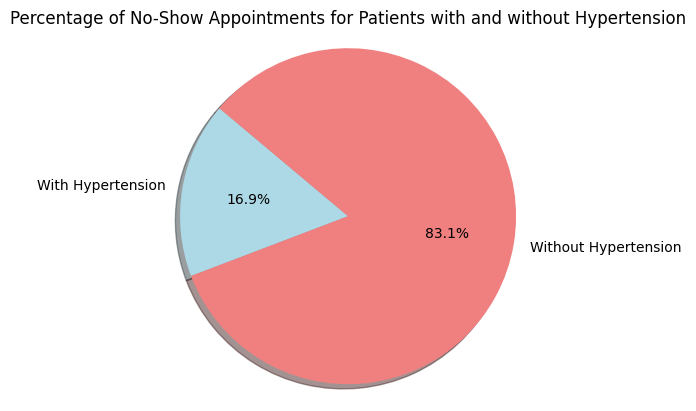

In [31]:
# Q2. Does the presence of hypertension among patients have an impact on their likelihood of missing medical appointments?"

# Calculate the total number of appointments
total_appointments = len(copied_df)

# Calculate the number of appointments with hypertension and no-show
hypertension_no_show = len(copied_df[(copied_df['hypertension'] == 1) & (copied_df['no-show'] == 'Yes')])

# Calculate the number of appointments without hypertension and no-show
no_hypertension_no_show = len(copied_df[(copied_df['hypertension'] == 0) & (copied_df['no-show'] == 'Yes')])

# Calculate the percentage of no-show appointments for patients with and without hypertension
percentage_hypertension_no_show = (hypertension_no_show / total_appointments) * 100
percentage_no_hypertension_no_show = (no_hypertension_no_show / total_appointments) * 100

# Print the results
print(f"Percentage of no-show appointments for patients with hypertension: {percentage_hypertension_no_show:.2f}%")
print(f"Percentage of no-show appointments for patients without hypertension: {percentage_no_hypertension_no_show:.2f}%")

# Data for the pie chart
labels = ['With Hypertension', 'Without Hypertension']
sizes = [percentage_hypertension_no_show, percentage_no_hypertension_no_show]
colors = ['lightblue', 'lightcoral']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of No-Show Appointments for Patients with and without Hypertension')
plt.show()













In [32]:
 #Q3 is there's a connection between the day of the week an appointment is scheduled and the likelihood of a no-show. #Convert the appointment day to a datetime format
copied_df['appointment_day'] = pd.to_datetime(copied_df['appointment_day'])

# Extract the day of the week (0=Monday, 6=Sunday)
copied_df['day_of_week'] = copied_df['appointment_day'].dt.dayofweek

# Create a dictionary to map day of the week to the name
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Apply the mapping to create a new column for day names
copied_df['day_name'] = copied_df['day_of_week'].map(day_map)

# Calculate the percentage of no-show appointments for each day of the week
day_no_show_stats = copied_df.groupby('day_name')['no-show'].value_counts(normalize=True).unstack() * 100

# Print the results
print("No-Show Statistics by Day of the Week:")
print(day_no_show_stats)











No-Show Statistics by Day of the Week:
no-show           No        Yes
day_name                       
Friday     78.773858  21.226142
Monday     79.351942  20.648058
Saturday   76.923077  23.076923
Thursday   80.645909  19.354091
Tuesday    79.906396  20.093604
Wednesday  80.310821  19.689179


In [33]:
# Identify the day with the highest no-show rate
day_with_max_no_show = day_no_show_stats['Yes'].idxmax()
print(day_with_max_no_show)


Saturday


In [34]:
day_with_max_no_show = day_no_show_stats['No'].idxmax()
print(day_with_max_no_show)

Thursday


In [37]:

# Q4. What are the key factors that contribute to patients missing their appointments?
# Explore factors contributing to no-shows
factors = ['gender', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap']

for factor in factors:
    factor_no_show_stats = copied_df.groupby(factor)['no-show'].value_counts(normalize=True).unstack() * 100
    print(f"No-Show Statistics by {factor.capitalize()}:")
    print(factor_no_show_stats)
    print()




No-Show Statistics by Gender:
no-show         No        Yes
gender                       
F        79.685129  20.314871
M        80.032052  19.967948

No-Show Statistics by Age:
no-show          No        Yes
age                           
0         81.944052  18.055948
1         81.742191  18.257809
2         84.425216  15.574784
3         81.692003  18.307997
4         78.290993  21.709007
..              ...        ...
98        83.333333  16.666667
99       100.000000        NaN
100      100.000000        NaN
102      100.000000        NaN
115       40.000000  60.000000

[103 rows x 2 columns]

No-Show Statistics by Scholarship:
no-show             No        Yes
scholarship                      
0            80.192645  19.807355
1            76.263696  23.736304

No-Show Statistics by Hypertension:
no-show              No        Yes
hypertension                      
0             79.096083  20.903917
1             82.698041  17.301959

No-Show Statistics by Diabetes:
no-show      

In [ ]:
#Q5 Do patients who receive reminder SMS notifications have a lower rate of missing medical appointments compared to those who do not receive reminders?
sms_no_show_stats = copied_df.groupby('sms_received')['no-show'].value_counts(normalize=True).unstack() * 100

# Print the results
print("No-Show Statistics by SMS Reminder:")
print(sms_no_show_stats)

# Create a stacked bar plot
categories = ['Received', 'Not Received']
plt.bar(categories, sms_no_show_stats['No'], label='No')
plt.bar(categories, sms_no_show_stats['Yes'], bottom=sms_no_show_stats['No'], label='Yes')
plt.xlabel('SMS Reminder')
plt.ylabel('Percentage')
plt.title('No-Show Statistics by SMS Reminder')
plt.legend()
plt.show()





Total Appointments with Reminders: 35482
Attended Appointments with Reminders: 25698
Percentage of Attended Appointments with Reminders: 72.43%


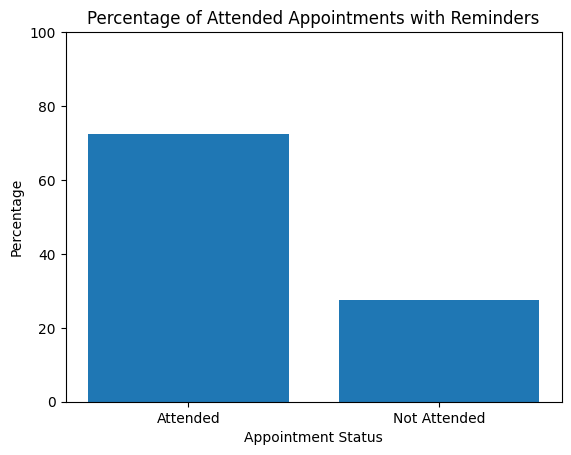

In [36]:
#Q6. Calculate the percentage of appointments where reminders were sent and track how many of those resulted in attendance.


# Calculate the total number of appointments with reminders sent
total_appointments_with_reminders = len(copied_df[copied_df['sms_received'] == 1])

# Calculate the number of appointments with reminders sent that were attended
attended_appointments_with_reminders = len(copied_df[(copied_df['sms_received'] == 1) & (copied_df['no-show'] == 'No')])

# Calculate the percentage of appointments with reminders sent that were attended
percentage_attended_with_reminders = (attended_appointments_with_reminders / total_appointments_with_reminders) * 100

# Print the results
print(f"Total Appointments with Reminders: {total_appointments_with_reminders}")
print(f"Attended Appointments with Reminders: {attended_appointments_with_reminders}")
print(f"Percentage of Attended Appointments with Reminders: {percentage_attended_with_reminders:.2f}%")

# Create a bar plot
plt.bar(['Attended', 'Not Attended'], [percentage_attended_with_reminders, 100 - percentage_attended_with_reminders])
plt.xlabel('Appointment Status')
plt.ylabel('Percentage')
plt.title('Percentage of Attended Appointments with Reminders')
plt.ylim(0, 100)
plt.show()





<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

Appointments with patients who have a scholarship (scholarship=1) tend to have a higher no-show rate (around 23.74%) compared to appointments without a scholarship (scholarship=0) with a no-show rate around 19.81%.

Patients with diabetes (diabetes=1) also have a slightly lower no-show rate (around 18.00%) compared to patients without diabetes (diabetes=0) with a no-show rate around 20.36%.

There's a small difference in no-show rates between patients with alcoholism (alcoholism=1) and those without alcoholism (alcoholism=0), with both groups having no-show rates around 20%.

No-show rates vary among different levels of handicap. For instance, patients with a handicap level of 1 have a no-show rate around 17.92%, while patients with a handicap level of 4 have a higher no-show rate around 33.33%.

For females (gender=F), approximately 20.31% of appointments were no-shows, while 79.69% were attended.
For males (gender=M), approximately 19.97% of appointments were no-shows, while 80.03% were attended.

this data suggests that approximately 72.43% of the appointments where SMS reminders were sent were attended by the patients. This indicates that sending SMS reminders is associated with a positive impact on appointment attendance. The higher the percentage, the more effective the SMS reminders are in encouraging patients to show up for their appointments.

he percentage "72.43%" represents the proportion of medical appointments for which patients received SMS reminders and actually attended the appointments. In other words, out of all the appointments where SMS reminders were sent, approximately 72.43% of those appointments were attended by the patients.

### Limitation of the dataset
While it includes SMS reminders, the dataset might not account for other communication methods, such as phone calls or emails, which could also influence appointment attendance.

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb